In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pickle
import os
import itertools
plt.style.use('seaborn-poster')

In [ ]:
webplot_dir = './webplot_results'

results_dir = './results'
variants = ['nostack_l', 'stack4_l', 'belief0', 'obsvec']
# columns = ['eval_episode_lengths', 'train_episode_returns', 
#            'train_episode_lengths', 'eval_episode_returns', 'average_return']

total_steps = 1e8

In [3]:
webplot_data = [np.genfromtxt(os.path.join(webplot_dir, '{}player_data.csv').format(i), delimiter=',') for i in range(2,5)]

In [4]:
experiment = {}

for v in variants:
    log_dir = os.path.join(results_dir, v)
    dat = pickle.load(open(os.path.join(log_dir, os.listdir(log_dir)[-1]), 'rb'))
    dat = sorted(dat.items(), key=lambda v: int(v[0].split("iter")[-1]))
    avg_return = np.array([d[1]['average_return'] for d in dat])
    
    ep_lens_avg = np.array([np.mean(d[1]['train_episode_lengths']) for d in dat])
    ts = np.cumsum([np.sum(d[1]['train_episode_lengths']) for d in dat])
    
    experiment[v] = {'avg_return': avg_return,
                     'cumulative_steps': ts, 
                     'ep_lens': ep_lens_avg}

In [5]:
percent_complete = {v: experiment[v]['cumulative_steps'] / total_steps for v in variants}
run_lens = {k: len(v) for k,v in percent_complete.items()}
iterations = percent_complete[max(run_lens, key=run_lens.get)]

avg_ret = np.array([experiment[v]['avg_return'] for v in variants])
ret_dict = {v: np.squeeze(avg_ret[i]) for i, v in enumerate(variants)}

df = pd.DataFrame.from_dict(ret_dict, orient='index').T
df['iterations'] = iterations
df = df.set_index('iterations')

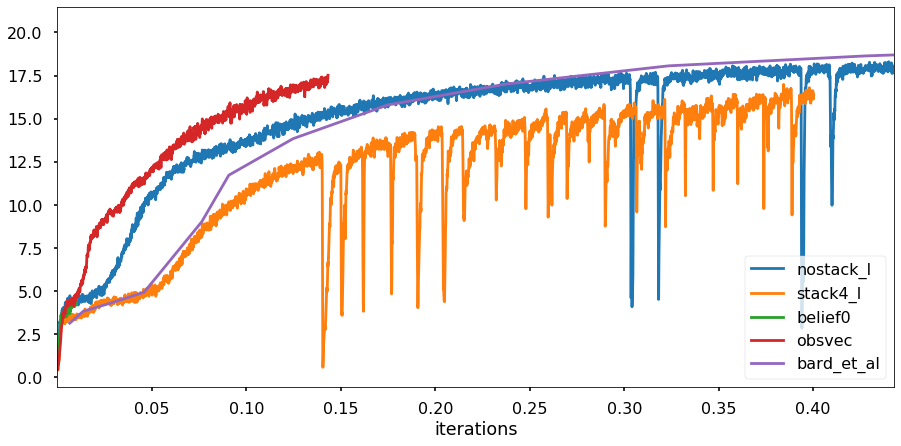

In [6]:
window = 5
df.rolling(window).mean().plot(figsize=(15,7))

plt.plot(webplot_data[0][2:,0], webplot_data[0][2:,1], label='bard_et_al')
plt.legend()

(50, 100)

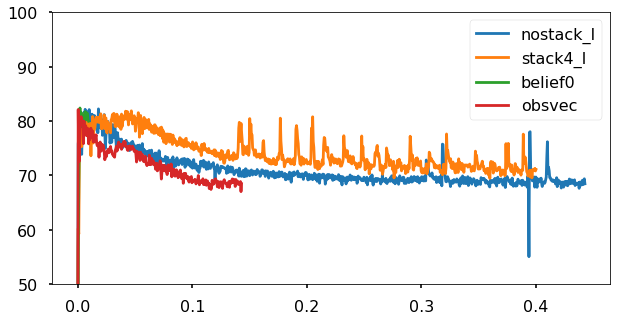

In [7]:
plt.figure(figsize=(10,5))
resample = 10
for v in variants:
    plt.plot(experiment[v]['cumulative_steps'][::resample] / total_steps, 
                 experiment[v]['ep_lens'][::resample],
             label=v)

plt.legend()
plt.ylim((50,100))

# with comms return and action counters

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import pickle
import os
import itertools
plt.style.use('seaborn-poster')

In [44]:
webplot_dir = './webplot_results'
results_dir = './results'
variants = {'comms_test': 'comms_test'}
total_steps = 1e8

In [14]:
webplot_data = {}
for i in range(2,6):
    dat = np.genfromtxt(os.path.join(webplot_dir, '{}player_data.csv').format(i), delimiter=',')
    webplot_data['{} players'.format(i)] = dat

Text(0.5, 1.0, 'Bard, Foerster et al.')

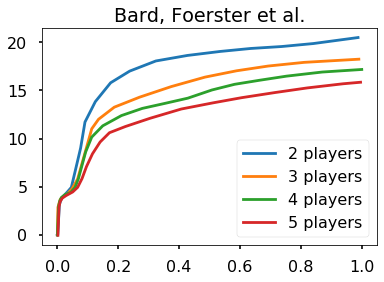

In [22]:
for k, v in webplot_data.items():
    plt.plot(v[:,0], v[:,1], label=k)

plt.legend()
plt.title("Bard, Foerster et al.")

In [73]:
experiment = {}

for label, path in variants.items():
    log_dir = os.path.join(results_dir, path)
    dat = pickle.load(open(os.path.join(log_dir, os.listdir(log_dir)[-1]), 'rb'))
    dat = sorted(dat.items(), key=lambda v: int(v[0].split("iter")[-1]))
    
    # cumulative timesteps per iteration
    ts = np.cumsum([np.sum(d[1]['train_episode_lengths']) for d in dat])
    
    # average episode length
    ep_lens_avg = np.array([np.mean(d[1]['train_episode_lengths']) for d in dat])
    
    # average extrinsic reward
    avg_return = np.array([d[1]['average_return'] for d in dat])
    
    # average intrinsic reward
    avg_comms_return = np.array([np.mean(d[1]['train_epsisode_comms_returns']) for d in dat])
    
    
    
    experiment[label] = {'avg_return': avg_return,
                         'avg_comms_return': avg_comms_return,
                         'cumulative_steps': ts, 
                         'ep_lens': ep_lens_avg}

In [74]:
percent_complete = {v: experiment[v]['cumulative_steps'] / total_steps for v in variants}
run_lens = {k: len(v) for k,v in percent_complete.items()}
iterations = percent_complete[max(run_lens, key=run_lens.get)]

avg_ret = np.array([experiment[v]['avg_return'] for v in variants])
ret_dict = {v: np.squeeze(avg_ret[i]) for i, v in enumerate(variants)}

df = pd.DataFrame.from_dict(ret_dict, orient='index').T
df['iterations'] = iterations
df = df.set_index('iterations')

# 2 Player

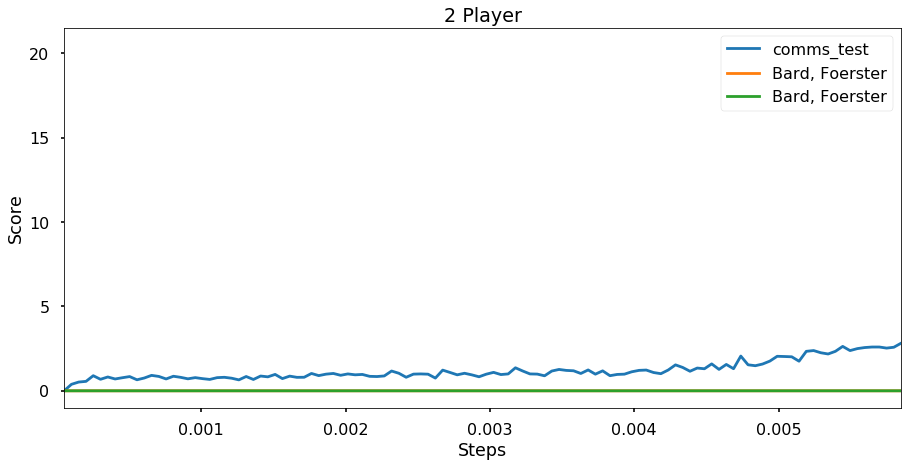

In [75]:
window = 1
ax = df.rolling(window).mean().plot(figsize=(15,7))
plt.plot(webplot_data['2 players'], label='Bard, Foerster')
plt.title('2 Player')
plt.ylabel('Score')
plt.xlabel('Steps')

plt.legend()

(50, 100)

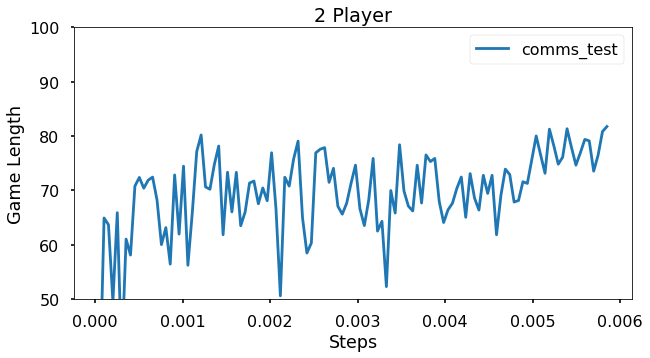

In [78]:
plt.figure(figsize=(10,5))
resample = 1
for v in variants:
    plt.plot(experiment[v]['cumulative_steps'][::resample] / total_steps, 
                 experiment[v]['ep_lens'][::resample],
             label=v)

plt.legend()
plt.title('2 Player')
plt.ylabel('Game Length')
plt.xlabel('Steps')
plt.ylim((50,100))